In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Additional libraries used
from uuid import uuid4
import requests
import zipfile
import os

Question 1 - What are the most important features of the data set, what do they mean, and how do they drive the predicted outcome? 

The data contained upwards of around forty-eight available columns (depending on year) so the most relevant columns were selected after a preliminary data review. Only the following columns were kepy across all four datasets between 2021 and 2024.

•	Age – object data type
•	Country – object data type
•	DevType – object data type
•	EdLevel – object data type
•	LearnCode – object data type
•	MainBranch – object data type
•	YearsCode – object data type

For my evaluation, YearsCode was the most imporant column since, post procoessing, it represnted the target variable. This column was populated with a variety of values ranging from null values, to string values like Less than 1 year, and numeric string values like 10. So this column was cleaned and converted to integers. These new values were then copied into a new column called YearsNorm and convert into float values before normalizing this column. The important features I used were:

•	Age – object data type
•	DevType – object data type
•	EdLevel – object data type

These features were also cleaned and copied into new columns:

•	AgeNew – integer data type
•	DevTypeNew – integer data type
•	EdLevelNew – integer data type

Integers were assigned to these columns since they represnted ordinal values, based on a hierarchal order. Together with the target variable YearsCode, these four columns helped to predict an outcome using a selected model.

In [2]:
# Download, extract, and read csv contained in the url into a dataframe.
# 2024 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2024.zip')
file_name = ('stack-overflow-developer-survey-2024.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

# Remove the downloaded ZIP file from memory.
os.remove(file_name)

# Keep the columns used to predict how features (age, devtype, and
# edlevel) impact years coding (the target variable).
d24 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# 2023 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2023.zip')
file_name = ('stack-overflow-developer-survey-2023.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

os.remove(file_name)

d23 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# 2022 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2022.zip')
file_name = ('stack-overflow-developer-survey-2022.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

os.remove(file_name)

d22 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# 2021 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2021.zip')
file_name = ('stack-overflow-developer-survey-2021.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

os.remove(file_name)

# Remove csv file from memory.
os.remove('survey_results_public.csv')

d21 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# This merges all four of the dataframes together.
df = pd.concat([d21, d22, d23, d24], ignore_index=True)

In [3]:
# Since ResponseId was not consistent across the data, OID column with
# random values was added to enable data tracking during cleaning
# process.
from uuid import uuid4
def generate_uuid(_):
    return uuid4()
df['OID'] = df.index.map(generate_uuid)

# Clean YearsCode column to remove non-numerical or NULL values and
# assign float datatype.
df = df.dropna(subset=['YearsCode']).reset_index(drop=True)
df = df.drop(df[df['YearsCode'] == 'Less than 1 year'].index)
df = df.drop(df[df['YearsCode'] == 'More than 50 years'].index)
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCode'] = df['YearsCode'].astype(float)

In [4]:
# Clean EdLevel column by replacing verbose string with readable
# concise value.
df = df.dropna(subset=['EdLevel']).reset_index(drop=True)
dt = df['EdLevel']
dt = (dt.where
      (~dt.str.contains('Master',
                        case=False, regex=False), 'MA/MS/MEng/MBA'))
dt = (dt.where
      (~dt.str.contains('Bachelor',
                        case=False, regex=False), 'BA/BS/BEng'))
dt = (dt.where
      (~dt.str.contains('Other doctoral degree',
                        case=False, regex=False), 'Doctorate'))
dt = (dt.where
      (~dt.str.contains('Secondary',
                        case=False, regex=False), 'HS'))
dt = (dt.where
      (~dt.str.contains('Some college',
                        case=False, regex=False), 'SomeColl'))
dt = (dt.where
      (~dt.str.contains('Professional',
                        case=False, regex=False), 'Doctorate'))
dt = (dt.where
      (~dt.str.contains('Something else',
                        case=False, regex=False), 'Unknown'))
dt = (dt.where
      (~dt.str.contains('Primary',
                        case=False, regex=False), 'Elem/Mid'))
dt = (dt.where
      (~dt.str.contains('Associate',
                        case=False, regex=False), 'AA/AS'))
df['EdLevel'] = dt

# Copy edlevel values into edlevelnew column and convert values to
# integers.
normalized2 = df['EdLevel'].astype('string')
_ed2_pd = normalized2
_ed2_stripped = _ed2_pd.str.strip()
_na_like2 = {'na', 'nan', 'n/a', 'n\\a'}
normalized2 = _ed2_pd.mask(_ed2_stripped.eq('') | _ed2_stripped.str.casefold().
                           isin(_na_like2), pd.NA)
ed_map2 = {
    "Doctorate": 7,
    "MA/MS/MEng/MBA": 6,
    "BA/BS/BEng": 5,
    "AA/AS": 4,
    "SomeColl": 3,
    "HS": 2,
    "Elem/Mid": 1,
    "Unknown": 0,
}
df['EdLvlNew'] = normalized2.map(ed_map2).fillna(0).astype(int)

In [5]:
# Make values in age column more concise, copy those values to the 
# AgeNew column, and convert values to integers.
df['Age'] = (df['Age'].replace('', 'Not stated').fillna
             ('Not stated'))
def _clean_age_noregex(val) -> str:
    if val is None:
        return 'Unknown'
    s = str(val).strip()
    if s.casefold() == 'prefer not to say':
        return 'Not stated'
    tokens = s.split()
    result = []
    i = 0
    while i < len(tokens):
        if tokens[i].casefold() == 'years':
            if i + 1 < len(tokens) and tokens[i + 1].casefold() == 'old':
                i += 2
                continue
            i += 1
            continue
        result.append(tokens[i])
        i += 1
    return ' '.join(result).strip()
age_pd = df['Age'].astype('string').apply(_clean_age_noregex)
df['Age'] = age_pd
df = df.drop(df[df['Age'] == 'Unknown'].index)
age_mapping = {
    "65 or older": 7,
    "55-64": 6,
    "45-54": 5,
    "35-44": 4,
    "25-34": 3,
    "18-24": 2,
    "Under 18": 1,
    "Not stated": 0,
}
df["AgeNew"] = df["Age"]
for key, value in age_mapping.items():
    df["AgeNew"] = df["AgeNew"].str.replace(key, str(value))
df["AgeNew"] = pd.to_numeric(df["AgeNew"], errors='coerce')

In [6]:
# Reduce verboseness of Devtype column.
df['DevType'] = df['DevType'].fillna('Not Specified')
df['DevType'] = df['DevType'].astype('string')
dt = df['DevType']

# 1) Broad "Developer" group
dt = (dt.where
      (~dt.str.contains('Developer',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('DevOps',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineering manager',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineer, site reliability;Educator;' 
                        'Database administrator',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Research & Development role',
                        case=False,regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineer, site reliability',
                        case=False,regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Cloud infrastructure engineer;Scientist',
                        case=False, regex=False), 'Developer'))

# 2) Data roles
dt = (dt.where
      (~dt.str.contains('Data scientist or machine learning specialist',
                        case=False, regex=False), 'Data Scientist'))
dt = (dt.where
      (~dt.str.contains('Scientist',
                        case=False, regex=False),'Data Scientist'))
dt = (dt.where
      (~dt.str.contains('Engineer, data',
                        case=False, regex=False),'Data Engineer'))
dt = (dt.where
      (~dt.str.contains('Data engineer',
                        case=False, regex=False),'Data Engineer'))
dt = (dt.where
      (~dt.str.contains('Engineer, data;Academic researcher',
                        case=False, regex=False), 'Data Analyst'))
dt = (dt.where
      (~dt.str.contains('Data or business analyst',
                        case=False,regex=False), 'Data Analyst'))

# 3) Other catch-alls
dt = (dt.where
      (~dt.str.contains('Other',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Project manager',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Product manager',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Educator;Designer',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Student;Designer;Marketing or sales professional',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Educator;Blockchain',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Educator',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Designer',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Academic researcher',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Marketing or sales professional',
                        case=False,regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Student',
                        case=False, regex=False), 'Other'))

# 4) Specific titles
dt = (dt.where
      (~dt.str.contains('Scientist;Blockchain',
                        case=False,regex=False), 'Blockchain'))
dt = (dt.where
      (~dt.str.contains('Senior Executive (C-Suite, VP, etc.)',
                        case=False, regex=False), 'Executive'))
dt = (dt.where
      (~dt.str.contains('Cloud infrastructure engineer',
                        case=False,regex=False), 'Cloud Engineer'))
dt = (dt.where
      (~dt.str.contains('Security professional',
                        case=False, regex=False), 'Cyber/Network Engineer'))
dt = (dt.where
      (~dt.str.contains('System administrator',
                        case=False,regex=False), 'IT'))
dt = (dt.where
      (~dt.str.contains('Database administrator',
                        case=False,regex=False), 'IT'))
dt = (dt.where
      (~dt.str.contains('Hardware Engineer',
                        case=False,regex=False), 'IT'))
df['DevType'] = dt
df = df.drop(df[df['DevType'] == 'Not Specified'].index)

# Copy new values from DevType column to DevTypeNew column and convert
# values to integers.
dev_type_mapping = {
    "Developer": 7,
    "Data Scientist": 7,
    "Data Engineer": 7,
    "Cloud Engineer": 7,
    "Cyber/Network Engineer": 6,
    "IT": 5,
    "Blockchain": 4,
    "Executive": 3,
    "Data Analyst": 2,
    "Other": 1,
}
df["DevTypeNew"] = df["DevType"]
for key, value in dev_type_mapping.items():
    df["DevTypeNew"] = df["DevTypeNew"].str.replace(key, str(value))
df['DevTypeNew'] = df['DevTypeNew'].astype(int)

In [7]:
#Simplify MainBranch values
mainbranch_mapping = {
    'I am a developer by profession': 'Dev',
    'I am a student who is learning to code': 'Student',
    'I used to be a developer by profession, but no longer am'
    : 'DevPrevious',
    'I am not primarily a developer, but I write code sometimes as part of '
    'my work': 'CodeForWork',
    'I code primarily as a hobby'
    : 'Hobby',
    'None of these'
    : 'Unknown',
    'I am learning to code'
    : 'Student',
    'I am not primarily a developer, but I write code sometimes as part of '
    'my work/studies': 'CodeForWorkStudy'
}
df['MainBranch'] = (df['MainBranch'].astype('string').str.strip().map
                    (mainbranch_mapping))
df['MainBranch'] = df['MainBranch'].fillna('Unknown')

In [8]:
# Clean country column and convert names to abbreviations where possible.
_country = df['Country'].astype('string').str.strip()
_exact_map = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'Bosnia and Herzegovina': 'Bosnia',
    'Brunei Darussalam': 'Brunei',
    "Côte d'Ivoire": 'Ivory Coast',
    "CÃ´te d'Ivoire": 'Ivory Coast',
    'Central African Republic': 'CAR',
    'Democratic Republic of the Congo': 'DRC',
    'Republic of Moldova': 'Maldova',
    'Republic of North Macedonia': 'N. Macedonia',
    'The former Yugoslav Republic of Macedonia': 'N. Macedonia',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
}
_country = _country.replace(_exact_map)
_lower = _country.str.casefold()
_country = (_country.mask(_country.str.startswith
                          ('Congo, Republic of the',na=False),
                          'Congo'))
_country = _country.mask(_lower.str.contains
                         ('hong kong',na=False,regex=False),
                         'Hong Kong')
_country = _country.mask(_country.str.startswith
                         ('Iran, Islamic Republic of',na=False),
                         'Iran')
_country = _country.mask(_country.eq
                         ("Lao People's Democratic Republic"),
                         'Laos')
_country = _country.mask(_country.str.startswith
                         ('Micronesia, Federated States ''of',na=False),
                         'Micronesia')
_country = _country.mask(_country.isin
                         (['Republic of Korea','South Korea']),
                         'S. Korea')
_country = _country.mask(_country.eq
                         ("Democratic People's Republic of Korea"),
                         'N. Korea')
_country = _country.mask(_country.str.startswith
                         ('Venezuela, Bolivarian Republic'' of', na=False),
                         'Venezuela')
_country = _country.mask(_lower.eq
                         ('hong kong'),
                         'China')
df['Country'] = _country

Question 2 - Which feature impacts coding experience the most? The 25 to 34-year olds provide the most value from a coding experience perspect, regardless of education or work role. 

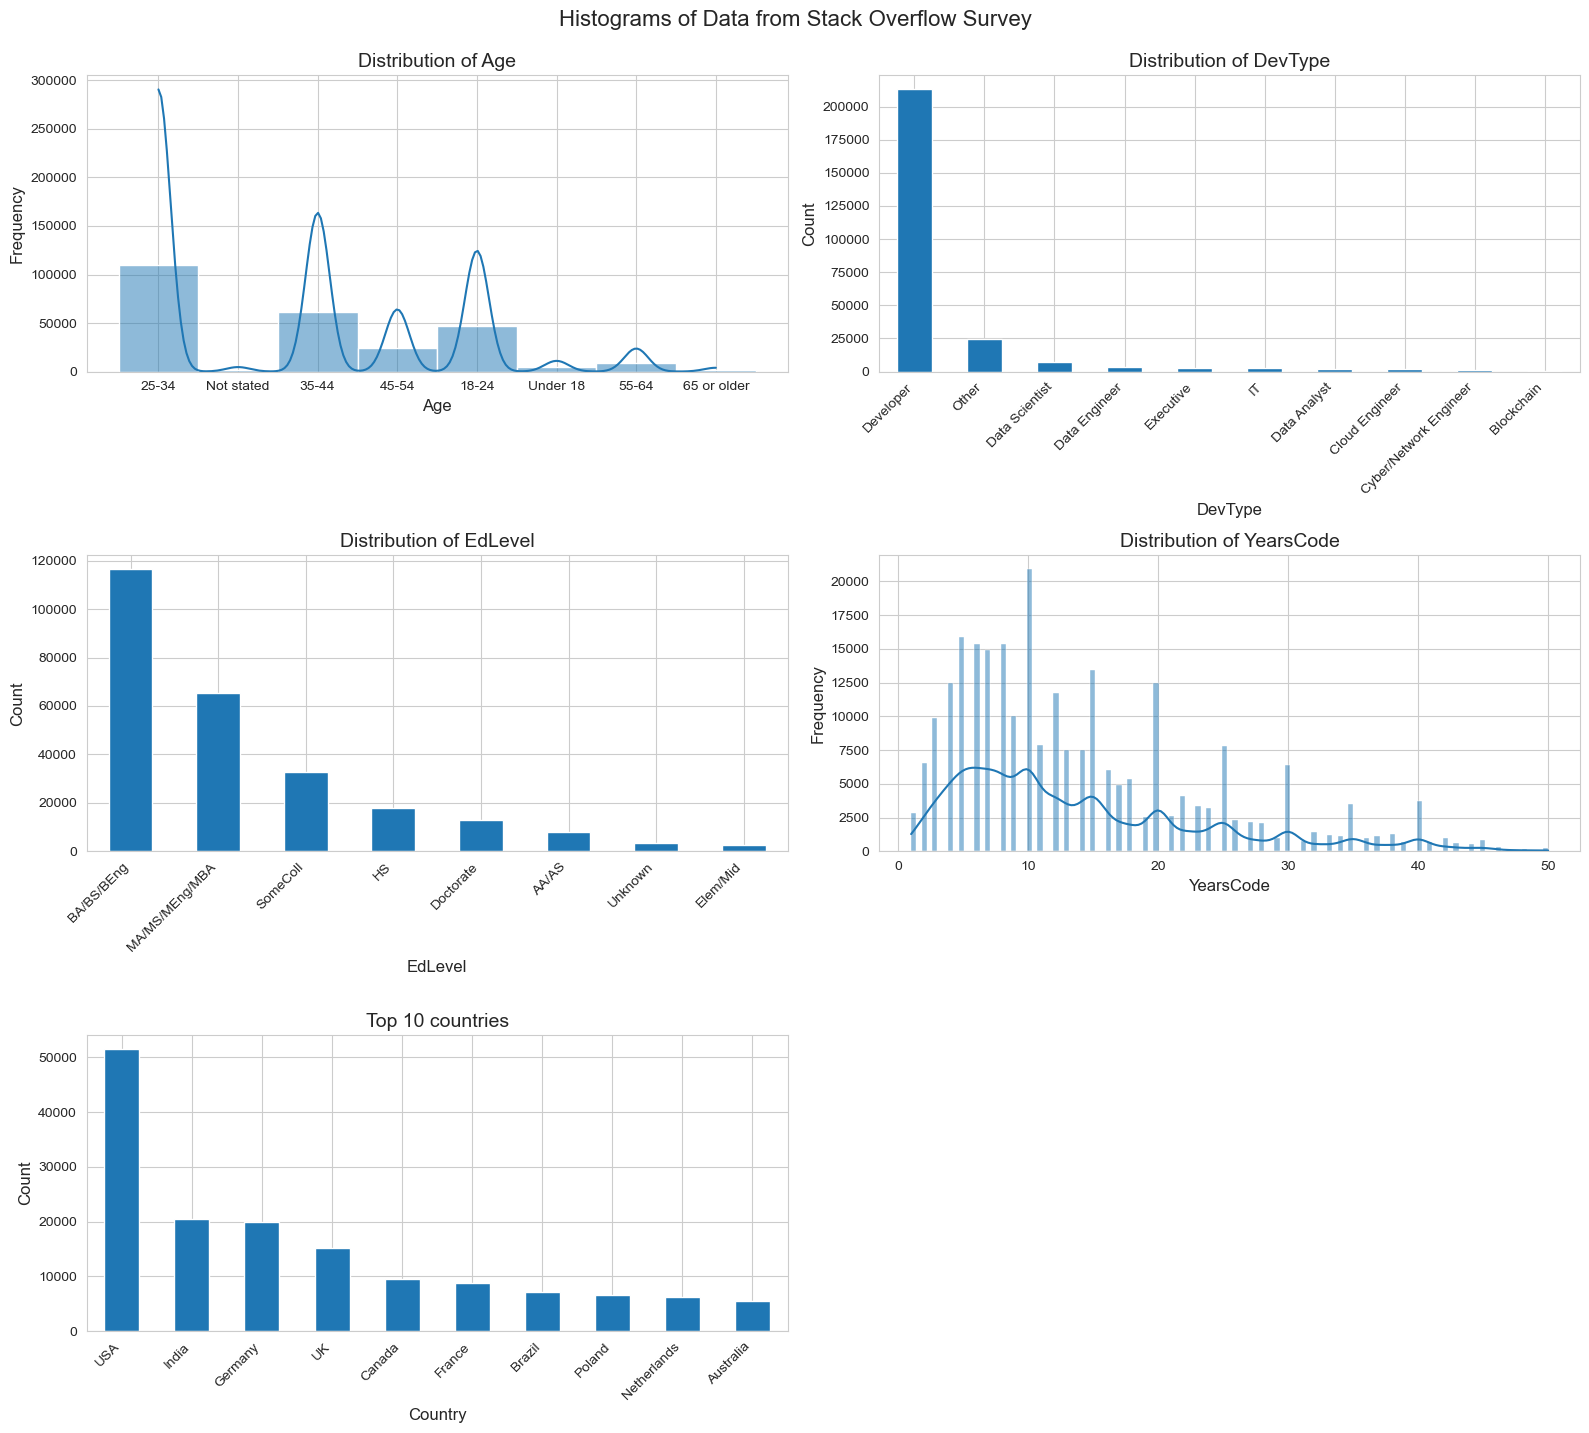

In [15]:
# Create histrogram of chart dataframe.
chart = df[['Age', 'DevType', 'EdLevel', 'YearsCode', 'Country']]
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 14))
axes = axes.flatten()

# Creates histograms for each column. 
for i, column in enumerate(chart.columns):
    if i < len(axes): 
        # For numeric columns (Age and YearsCode)
        if column in ['Age', 'YearsCode']:
            sns.histplot(data=chart, x=column, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {column}', fontsize=14)
            axes[i].set_xlabel(column, fontsize=12)
            axes[i].set_ylabel('Frequency', fontsize=12)

        # For categorical columns (DevType, EdLevel, Country)
        else:
            value_counts = chart[column].value_counts()
            if len(value_counts) > 10:
                # For Country, show top 10
                if column == 'Country':
                    value_counts = value_counts.head(10)
                    title = f'Top 10 countries'
                # For DevType, show top categories
                elif column == 'DevType':
                    value_counts = value_counts.head(10)
                    title = f'Top 10 Developer Types'
                # For EdLevel, show all education levels
                else:
                    title = f'Distribution of {column}'
            else:
                title = f'Distribution of {column}'
            value_counts.plot(kind='bar', ax=axes[i])
            axes[i].set_title(title, fontsize=14)
            axes[i].set_xlabel(column, fontsize=12)
            axes[i].set_ylabel('Count', fontsize=12)
            plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.suptitle('Histograms of Data from Stack Overflow Survey', 
             fontsize=16, y=1.02)
plt.show()

In [ ]:
#2 - What unusual, or creative, insights are you able to gather from the data set?

In [10]:
# Create YearNorm column and copy values from YearsCode. YearNorm column will
# be used to store normalized data values.
df['YearNorm'] = df['YearsCode']
df = df[['Age', 'AgeNew', 'DevType', 'DevTypeNew', 'EdLevel', 'EdLvlNew',
         'YearsCode', 'YearNorm', 'Country', 'MainBranch', 'OID']]
df['YearsCode'] = df['YearsCode'].astype(int)

# Write cleaned data to CSV for manual check.
df.to_csv('CleanData.csv', index=False)

# Convert CSV back to dataframe in preperation for data normalization.
df = pd.read_csv("CleanData.csv")

In [11]:
# Normalize data
column_names_to_normalize = ['YearNorm']
df[column_names_to_normalize] = ((df[column_names_to_normalize]
                                 -df[column_names_to_normalize].min()) /
                                 (df[column_names_to_normalize].max()
                                 -df[column_names_to_normalize].min()))
dp = df[['AgeNew', 'DevTypeNew', 'EdLvlNew', 'YearNorm']]

# Target and feature variables set for model training.
y = dp['YearNorm']
X = dp[['AgeNew', 'DevTypeNew', 'EdLvlNew']]

array([[<Axes: title={'center': 'AgeNew'}>,
        <Axes: title={'center': 'DevTypeNew'}>],
       [<Axes: title={'center': 'EdLvlNew'}>,
        <Axes: title={'center': 'YearsCode'}>],
       [<Axes: title={'center': 'YearNorm'}>, <Axes: >]], dtype=object)

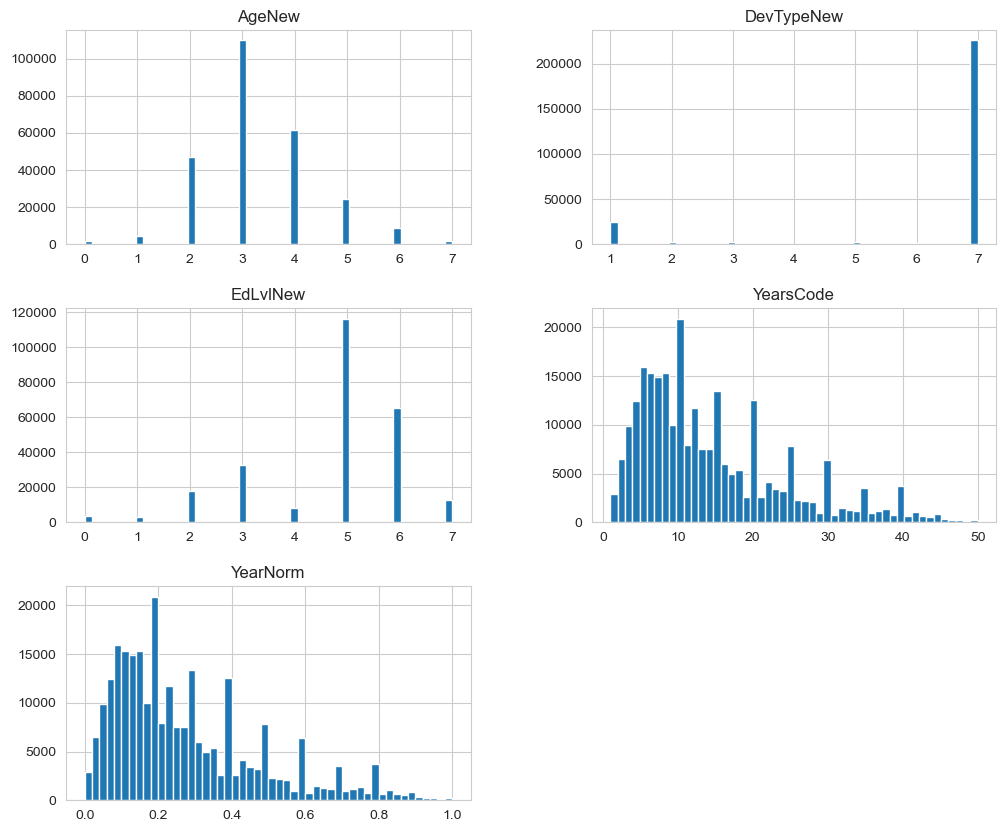

In [12]:
df.hist(bins=50, figsize=(12,10))

In [13]:
# Model train start.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create a Random Forest Regressor. Random forest chosen since target variable
# is continuous and feature variables are ordinal.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Make predictions.
y_pred = rf_model.predict(X_test)

# Calculate regression metrics using numpy.
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  

# Calculate regression metric R2 using sklearn.
r2 = r2_score(y_test, y_pred)  

# Print regression metrics.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0150
Root Mean Squared Error: 0.1226
Mean Absolute Error: 0.0903
R² Score: 0.6392


Question 3 - How accurate is this model? I would use the R-squared value first since it easy to explain and then I'd use the mean squred error if they wanted more information about the models accuracy.

Question 4 - How can we increase the models accuracy? We can add more data which should lead to a hire R-squared score. 